# Diabetes-Prevention

This notebook looks into using python-based machine learning and data science libaries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to use the following approach:
1. Problem Definition
2. Data
3. Modelling
4. EXperimenting
5. Evaluation

## 1. Problem Definition

In a statement;
> Given clinical parameters about a patient, let's predict whether or not they have diabetes

## 2. Data

Variables Table:
* age (Feature, Integer): Age of the patient
* gender (Feature, Categorical): Gender of the patient
* polyuria (Feature, Binary): Presence of polyuria (Yes/No)
* polydipsia (Feature, Binary): Presence of polydipsia (Yes/No)
* sudden_weight_loss (Feature, Binary): Experience of sudden weight loss (Yes/No)
* weakness (Feature, Binary): Experience of weakness (Yes/No)
* polyphagia (Feature, Binary): Presence of polyphagia (Yes/No)
* genital_thrush (Feature, Binary): Presence of genital thrush (Yes/No)
* visual_blurring (Feature, Binary): Experience of visual blurring (Yes/No)
* itching (Feature, Binary): Experience of itching (Yes/No)

Additional Variable Information:
* Age: Range from 20 to 65 years
* Gender: 1 for Male, 2 for Female
* Polyuria: 1 for Yes, 2 for No
* Polydipsia: 1 for Yes, 2 for No
* Sudden Weight Loss: 1 for Yes, 2 for No
* Weakness: 1 for Yes, 2 for No
* Polyphagia: 1 for Yes, 2 for No
* Genital Thrush: 1 for Yes, 2 for No
* Visual Blurring: 1 for Yes, 2 for No
* Itching: 1 for Yes, 2 for No
* Irritability: 1 for Yes, 2 for No
* Delayed Healing: 1 for Yes, 2 for No
* Partial Paresis: 1 for Yes, 2 for No
* Muscle Stiffness: 1 for Yes, 2 for No
* Alopecia: 1 for Yes, 2 for No
* Obesity: 1 for Yes, 2 for No
* Class: 1 for Positive, 2 for Negative

### Exploratory Data Analysis (EDA)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('diabetes_data_upload.csv')

In [10]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [11]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [12]:
df.Age.mean()

48.02884615384615

(array([320.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

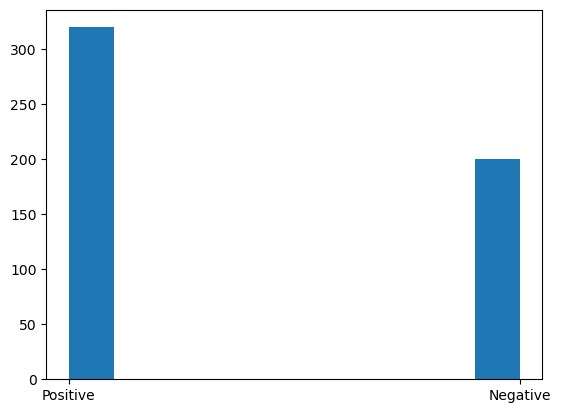

In [13]:
plt.hist(df['class'])

<BarContainer object of 520 artists>

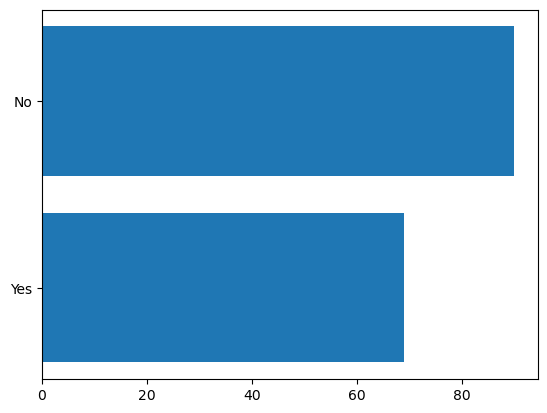

In [14]:
plt.barh(df['Obesity'], df['Age'])

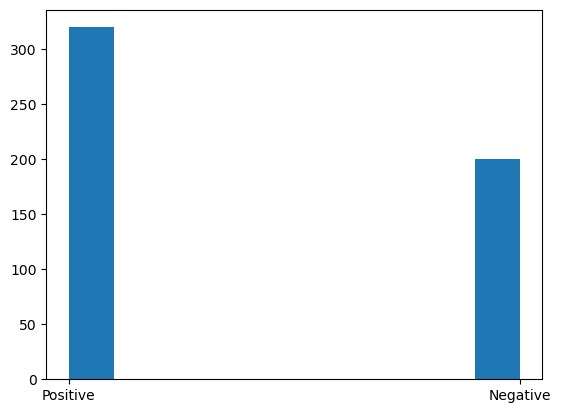

In [22]:
plt.hist(df['class']);

<BarContainer object of 520 artists>

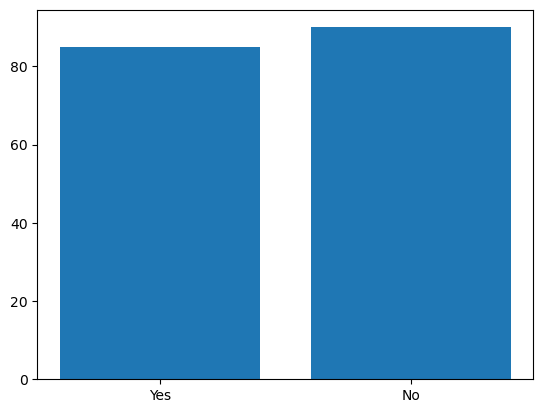

In [24]:
plt.bar(df['weakness'], df['Age'])

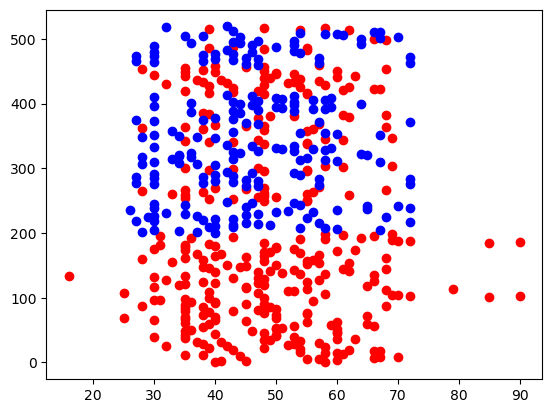

In [36]:
plt.scatter(df['Age'][df['class']=='Positive'],
           df.index[df['class']=='Positive'],
           c='red')

# Scatter with negative examples
plt.scatter(df['Age'][df['class']=='Negative'],
            df.index[df['class']=='Negative'],
            c='blue');

## 3. Modelling

### Split the data

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
np.random.seed(42)

X = df.drop('class', axis = 1)
y = df['class']


In [52]:

from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()
X = ord.fit_transform(X.astype(str))

In [54]:

from sklearn.preprocessing import LabelEncoder

LabelEncoder()
y = LabelEncoder.fit_transform(LabelEncoder,y)

In [56]:
X

array([[16.,  1.,  0., ...,  1.,  1.,  1.],
       [34.,  1.,  0., ...,  0.,  1.,  0.],
       [17.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [34.,  0.,  1., ...,  1.,  0.,  1.],
       [ 8.,  0.,  0., ...,  0.,  1.,  0.],
       [18.,  1.,  0., ...,  0.,  0.,  0.]])

In [58]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [60]:
X = pd.DataFrame(X)

In [62]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,16.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,34.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,21.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,36.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,15.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
516,24.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
517,34.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
518,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [64]:
y = pd.DataFrame(y)

In [66]:
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,0


### import and instantiate our models

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.25,
                                                  random_state=42)

In [93]:
X_train, y_train

(       0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
 286   3.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 235   2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 330  27.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
 62   31.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0   
 140  23.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
 ..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 472  47.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0   
 353  36.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
 201   4.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 121  11.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0   
 411  22.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
 
       14   15  
 286  0.0  0.0  
 235  0.0  0.0  

In [95]:
X_test, y_test

(       0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
 275  47.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0   
 93   16.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 6    33.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
 167  17.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
 90   21.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0   
 ..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 11   14.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
 338  24.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
 22   15.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0   
 478  30.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0   
 490  22.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
 
       14   15  
 275  1.0  0.0  
 93   0.0  0.0  

In [97]:
X_val, y_val

(       0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
 4    36.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
 489   6.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 211  16.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
 326  29.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   
 24   34.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0   
 ..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 457  24.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
 498  44.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0   
 258  11.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0   
 315   9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 178  26.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
 
       14   15  
 4    1.0  1.0  
 489  0.0  0.0  

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [136]:
clf = RandomForestClassifier()
knc = KNeighborsClassifier()
lr = LogisticRegression()
ada = AdaBoostClassifier()

models = {"KNC": knc,
          "LogisticRegression": lr,
          "RandomForestClassifier": clf,
          "AdaBoostClassifier": ada}

result={}

def model(model):
    model.fit(X_train, y_train)
    result[model] = model.score(X_val, y_val)


In [138]:
model(clf), model(knc), model(lr), model(ada)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

(None, None, None, None)

In [140]:
result

{RandomForestClassifier(): 0.963963963963964,
 KNeighborsClassifier(): 0.9099099099099099,
 LogisticRegression(): 0.9279279279279279,
 AdaBoostClassifier(): 0.9459459459459459}

## 4. Experimenting

### Evaluate the just trained model

In [147]:
clf_y_pred = clf.predict(X_val)

In [149]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,RocCurveDisplay

In [153]:
def evaluate(y_true, y_pred):
    print(f'precision_score:{precision_score(y_true, y_pred)}')
    print(f'recall_score:{recall_score(y_true, y_pred)}')
    print(f'f1_score:{f1_score(y_true, y_pred)}')
    print(f'classification_report:{classification_report(y_true, y_pred)}')
    

In [155]:
evaluate(clf_y_pred, y_val)

precision_score:0.9344262295081968
recall_score:1.0
f1_score:0.9661016949152542
classification_report:              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.93      1.00      0.97        57

    accuracy                           0.96       111
   macro avg       0.97      0.96      0.96       111
weighted avg       0.97      0.96      0.96       111



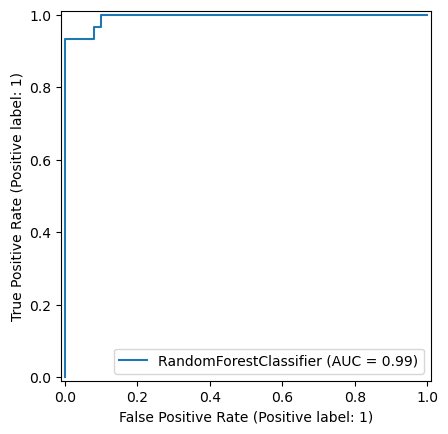

In [175]:
RocCurveDisplay.from_estimator(estimator=clf, 
                               X=X_val, 
                               y=y_val)

In [179]:
 cm = confusion_matrix(clf_y_pred,y_val)

In [183]:
import seaborn as sns

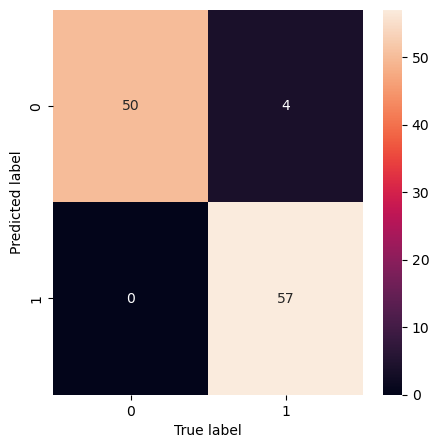

In [185]:
def plot_conf_mat(y_pred, y_valid):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(cm,
                     annot=True, # Annotate the boxes
                     cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(clf_y_pred, y_val)

### Hyperparameter tuning

**RandomizedSearchCV**

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [165]:
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

rs_rf = RandomizedSearchCV(estimator=clf,
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [167]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [169]:
rs_rf.score(X_val, y_val)

0.918918918918919

In [171]:
clf.score(X_val, y_val)

0.963963963963964

In [187]:
from joblib import dump, load

dump(clf, filename='Diabetes_prediction_model_clf.joblib')

['Diabetes_prediction_model_clf.joblib']

## Now work on the test data

In [192]:
clf = load(filename='Diabetes_prediction_model_clf.joblib')

In [200]:
pred = clf.predict(X_test)